# Lab 12: Ordinary differential equations (2)

In this lab we'll continue to explore the use of `solve_ivp` to solve differential equations. In particular, we will look at *anharmonic* oscillators, which occur frequently throughout physics but have more complicated solutions than  familiar simple harmonic motion.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
%matplotlib notebook

## Anharmonic oscillator, version 1: asymmetric potential

First, consider the following potential:

$$\begin{align}
V(x) &= \tfrac12 k x^2(1 - \tfrac23 \alpha x) \\
F(x) &= -\frac{\mathrm dV}{\mathrm dx} = -kx(1 - \alpha x) \\
m\frac{\mathrm d^2x}{\mathrm dt^2} &= -kx(1 - \alpha x)
\end{align}$$

When $\alpha = 0$, this reduces to the familiar harmonic oscillator, but for $\alpha > 0$ this produces a weaker restoring force for positive $x$ than for negative $x$.

To get a sense of this, **plot $V(x)$ for $k = 1$ and $\alpha = \tfrac14$**.  *Note we assume $m=1$ throughout this lab script.

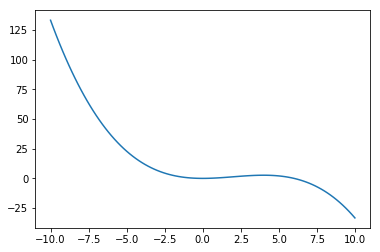

In [3]:
k = 1
alpha = 0.25
def V(x):
    return 0.5 * k * x**2 * (1 - ((2/3) * alpha * x))
x = np.linspace(-10,10,101)
plt.plot(x,V(x))

For the same $k$ and $\alpha$ values as above, **solve this ODE** with initial conditions $x = -1$, $v = 0$, considering a large enough time range to see at least three complete oscillations. **Plot $x$ as a function of $t$.** What do you notice about the shape of this curve? Is it what you expect?

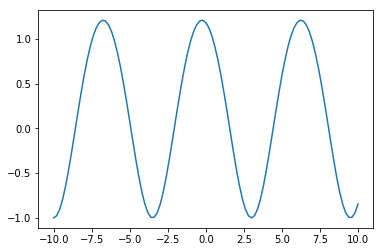

In [4]:
def derivative(t, x):
    x0, x1 = x
    dx0 =  x1
    dx1 = (-k/m) * x0 * (1 - alpha*x0)
    return dx0, dx1
k = 1
m = 1
alpha = 0.25
x = -1.
t = np.linspace(-10.0,10,101)
RK4_solution = solve_ivp(derivative, [-10.0,10.0],[-1,0],t_eval = t)
plt.plot(RK4_solution.t, RK4_solution.y[0])

On the same axes, **plot the solution for the same initial conditions and value of $k$, but with $\alpha$ ranging from 0 to 0.45 in steps of 0.05.** How, qualitatively, does $\alpha$ affect the amplitude and period of oscillation?

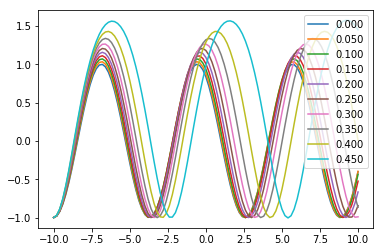

In [5]:
alpha = np.linspace(0.0,0.45,10)
for alpha in np.arange(0,0.5,0.05):
    RK4_solution = solve_ivp(derivative, [-10.0,10.0],[-1,0],t_eval = t)
    plt.plot(RK4_solution.t, RK4_solution.y[0],label = rf"{alpha:4.3f}")
    plt.legend()
    

To make this more quantitative, devise a method to **find the first minimum of each of the curves** in that plot – that is, the period of oscillation. **Plot the period $\tau$ as a function of $\alpha$.**

*Hint:* use the `numpy.argmin` function to find the index of the minimum value of $x$, then look up this index in the $t$ array.

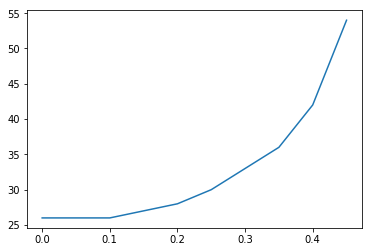

In [6]:
#np.argmin
t = np.linspace(5,10,101)
tau_list = []
alpha_list = []
for alpha in np.arange(0,0.5,0.05):
    RK4_solution = solve_ivp(derivative, [0,10.0],[-1,0],t_eval = t)
    alpha_list.append(alpha)
    tau_list.append(np.argmin(RK4_solution.y[0]))
plt.plot(alpha_list,tau_list)
#print(RK4_solution.y[0])

In a similar way, setting $\alpha$ back to $\tfrac14$, **plot solutions on the same axes for initial $x$ values between $0$ and $-1.9$.** **Plot the period $\tau$ as a function of $x_0$** and hence show that, unlike the harmonic oscillator, this anharmonic oscillator is *not isochronous*, that is, the period $\tau$ depends on the amplitude of oscillation.

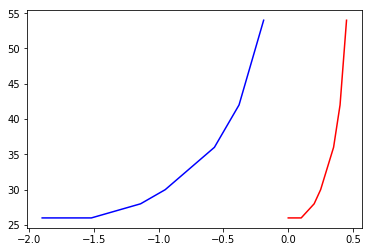

In [7]:
t = np.linspace(5,10,101)
tau_list = []
alpha_list = []
for alpha in np.arange(0,0.5,0.05):
    RK4_solution = solve_ivp(derivative, [0,10.0],[-1,0],t_eval = t)
    alpha_list.append(alpha)
    tau_list.append(np.argmin(RK4_solution.y[0]))
plt.plot(alpha_list,tau_list, 'r')

k = 1
m = 1
alpha = 0.25
x0_list = []
tau_list2 = []
for x0 in np.arange(-1.9,0,0.19):
    x0_list.append(x0)
    RK4_solution = solve_ivp(derivative, [5,10.0],[x0,0],t_eval = t)
    tau_list2.append(np.argmin(RK4_solution.y[0]))
plt.plot(x0_list,tau_list,'b')
#print(len(x0_list))
#?solve_ivp

▶ **CHECKPOINT 1**

## Python Interlude - subplots / enumerate ##

It will be useful to illustrate several plots at once in this exercise.  The pyplot.subplot can add subplots to a defined figure environment. 

In [8]:
?plt.subplot    

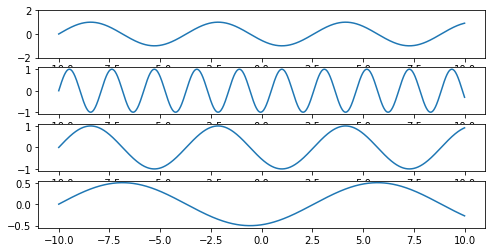

In [9]:
# try executing this and altering the values to make different configurations of subplots
x = np.linspace(-10,10,1000)
t = np.linspace(0,20,1000)
nrows = 4
ncolumns = 1
plt.figure(figsize=(8,4))   # note -- figsize alters .... you guessed it.
plt.subplot(nrows,ncolumns,1)
plt.plot(x,np.sin(1*t))
plt.ylim(-2,2)   # only applies to subplot...
plt.subplot(nrows,ncolumns,2)
plt.plot(x,np.sin(3*t))
plt.subplot(nrows,ncolumns,3)
plt.plot(x,np.sin(1*t))
plt.subplot(nrows,ncolumns,4)
plt.plot(x,0.5*np.sin(0.5*t));

*enumerate*  is a very useful counter that can be used to index a variety of things.  See the documentation.

In [10]:
?enumerate

In [11]:
# Here is an example

all_omegas = [0.5,1,3,5]

for i,omega in enumerate(all_omegas,start=1):
    print(i,omega)

1 0.5
2 1
3 3
4 5


We can use this count to index a variety of things.   In this lab it may be useful to index subplots.

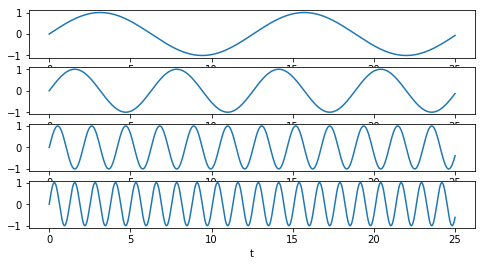

In [12]:
all_omegas = [0.5,1,3,5]

t = np.linspace(0,25,5000)
nrows = 4
ncolumns = 1
plt.figure(figsize=(8,4))   # note -- figsize alters .... you guessed it.

for isub,omega in enumerate(all_omegas,start=1):
    y = np.sin(omega*t)
    plt.subplot(nrows,ncolumns,isub)
    plt.plot(t,y)
    plt.xlabel('t')

Now back to the problem $\ldots$

## Anharmonic oscillator, version 2: symmetrical potential

An alternative anharmonic potential has no harmonic (second-order) term at all; instead, the leading term is of even order $p \geq 4$.

$$\begin{align}
V(x) &= \frac kp x^p \\
F(x) &= -\frac{\mathrm dV}{\mathrm dx} = -kx^{p-1} \\
m\frac{\mathrm d^2x}{\mathrm dt^2} &= -kx^{p-1}
\end{align}$$

**Plot $V(x)$ for $p = 2, 4, 6$.**

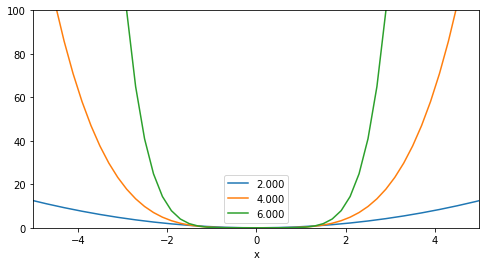

In [22]:
all_p = [2,4,6]
x = np.linspace(-100,100,1000)

nrows = 4
ncolumns = 1
plt.figure(figsize=(8,4))   # note -- figsize alters .... you guessed it.

for isub,p in enumerate(all_p,start=1):
    V_x = (k/p)*x**p
    plt.plot(x,V_x, label = rf"{p:4.3f}")
    plt.xlabel('x')
plt.ylim(0,100)
plt.xlim(-5,5)
plt.legend()

**Solve this ODE** for the starting conditions $x = -1.5$, $v = 0$, with $k = 1$ and taking even values of $p$ from 2 to 12. **Plot your solutions**, showing $x$ as a function of time.

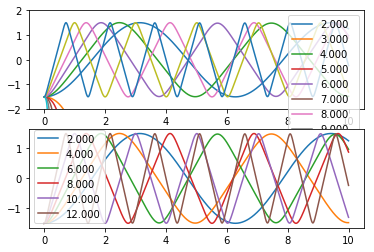

In [14]:
def Derivative(t,x):
    x0, x1 = x
    dx0 = x1
    dx1 = (-k/m)*x0**(p-1)
    return dx0, dx1 
k = 1
m = 1
t2 = np.linspace(0,10,5000)
plt.subplot(2,1,1)
for p in np.arange(2,13,1):
    RK4_solution = solve_ivp(Derivative, [0,25],[-1.5,0],t_eval = t2)
    plt.plot(RK4_solution.t, RK4_solution.y[0],label = rf"{p:4.3f}")
    plt.legend()
plt.ylim(-2,2)# Odd numbers are negative and spike down


plt.subplot(2,1,2)
for p in np.arange(2,14,2):
    RK4_solution = solve_ivp(Derivative, [0,25],[-1.5,0],t_eval = t2)
    plt.plot(RK4_solution.t, RK4_solution.y[0],label = rf"{p:4.3f}")
    plt.legend()

Now hold $p = 6$ constant and **plot the solution for a range of initial values of $x$**. Show that, again, an anharmonic oscillator is not isochronous.

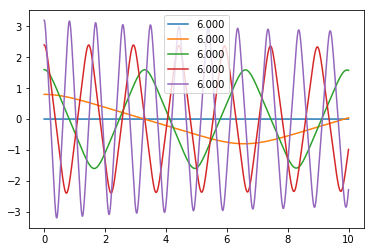

In [24]:
p = 6
t2 = np.linspace(0,10,5000)
for x in np.arange(0,4,0.8):
    RK4_solution = solve_ivp(Derivative, [0,25],[x,0],t_eval = t2)
    plt.plot(RK4_solution.t, RK4_solution.y[0],label = rf"{p:4.3f}")
    plt.legend()
#plt.ylim(0,5)

▶ **CHECKPOINT 2**

##  Driven oscillations and resonance

We now consider the possibility that the force might depend on $t$ as well as $x$. Specifically, we consider the case of an oscillator "driven" (or "forced") at a particular angular frequency $\omega$:

$$\begin{align}
V(x) &= \frac kp x^p \\
F(t, x) &= -\frac{\mathrm dV}{\mathrm dx} + F(t) = -kx^{p-1} + A\sin(\omega t)\\
m\frac{\mathrm d^2x}{\mathrm dt^2} &= -kx^{p-1} + A\sin(\omega t)
\end{align}$$

To start with, **solve this new equation** for $k = 1$, $p = 2$, $A = 1$, and $\omega$ distributed between 0.1 and 10. As always, **plot your results.** What do you notice about the amplitude of the oscillations?

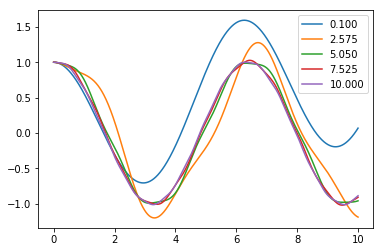

In [25]:
k = 1
p = 2
A = 1
m = 1
omega_sample = np.linspace(0.1,10,5)
def derivative3(t,x):
    x0, x1 = x
    dx0 = x1
    dx1 = (-k/m)*x0**(p-1) + A*np.sin(omega * t)
    return dx0, dx1
for omega in omega_sample:
    RK4_solution = solve_ivp(derivative3, [0,25],[1,0],t_eval = t2)
    plt.plot(RK4_solution.t, RK4_solution.y[0],label = rf"{omega:4.3f}")
    plt.legend()    

The phenomenon that you have observed is called *resonance*. Investigate it by **plotting the amplitude of oscillation against the frequency on a log-log plot**, for frequencies $\omega$ between about 0.01 and 30, and for $p = 2, 4, 6, 8, 10$ (as different curves on the same axes), keeping the other parameters the same. What do you notice about the strength and frequency of the resonance peak?

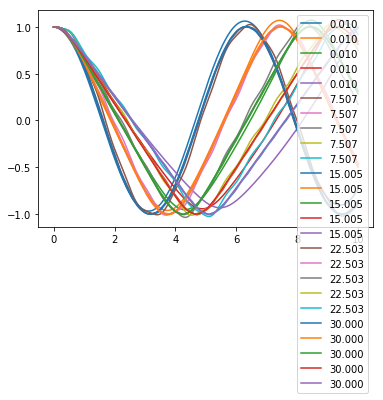

In [17]:
omega_sample2 = np.linspace(0.01,30,5)
p_sample = np.linspace(2,10,5)
q = 0
for omega in omega_sample2:
    for p in p_sample:
        RK4_solution = solve_ivp(derivative3, [0,25],[1,0],t_eval = t2)
        plt.plot(RK4_solution.t, RK4_solution.y[0],label = rf"{omega:4.3f}")
        q+=1
        plt.legend()     

▶ **CHECKPOINT 3**

**Extension:** investigate the oscillation patterns of the nonlinear oscillators near their resonant frequencies (that is, at frequencies near the peak in the previous graph). Can you explain what is happening?